In [19]:
!pip install  yfinance 
!pip install yahoofinancials
!pip install stldecompose

In [20]:
# EN - Libraries that I will use
# TR - Buradaki kütüphaneleri kullanacağım

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import yfinance as yf
from yahoofinancials import YahooFinancials
import plotly.graph_objects as go

from stldecompose import decompose

## Data Reading Process (Veri Okuma İşlemi)

In [21]:
# EN - I do a retrospective analysis of trading situations using Aselsan stocks, so I started the data from 2017 
# TR - Aselsan hisse senedini kullanarak, al sat durumlarının analizini geriye dönük yapıyorum. Bu sebepten veriyi 2017 yılından başlattım.
asels_df = yf.download("ASELS.IS",start = "2017-01-01",progress=False)
asels_df.index = pd.to_datetime(asels_df.index)
asels_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,6.210000,6.230000,6.090000,6.120000,5.945573,5250034
2017-01-03,6.125000,6.155000,6.025000,6.025000,5.853282,2642448
2017-01-04,6.040000,6.125000,6.040000,6.080000,5.906714,2622292
2017-01-05,6.115000,6.155000,6.050000,6.135000,5.960145,3975174
2017-01-06,6.135000,6.215000,6.100000,6.185000,6.008721,3745160
...,...,...,...,...,...,...
2020-10-20,18.120001,18.370001,18.080000,18.190001,18.190001,48560660
2020-10-21,18.250000,18.270000,18.070000,18.110001,18.110001,18468514
2020-10-22,18.090000,18.490000,18.000000,18.280001,18.280001,52222765


In [22]:
# EN - A candlestick is a type of price chart used in technical analysis. It shows us the prices of open, high, low and close.
# TR - Şamdan grafiği, teknik analiz yöntemleri için kullanılan bir fiyat çizelgesidir. Bize açılış, günün en yüksek fiyatı, en düşük fiyatı ve kapanuş fiyatını verir.

fig = go.Figure(data = [go.Candlestick(x = asels_df.index,
                                       open = asels_df["Open"],
                                       high = asels_df["High"],
                                       low = asels_df["Low"],
                                       close = asels_df["Close"]
                                       )]    )
fig.show()

In [23]:
# EN - Given statistical information about data
# TR - Veri seti hakkında istatistiksel bilgileri verir.
asels_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,985.0,1.239328e+01,2.958003e+00,6.040000,9.870000e+00,1.222000e+01,1.439000e+01,2.280000e+01
High,985.0,1.258008e+01,3.030752e+00,6.125000,1.008000e+01,1.238000e+01,1.457000e+01,2.363000e+01
Low,985.0,1.220687e+01,2.887525e+00,6.025000,9.765000e+00,1.207000e+01,1.406000e+01,2.115000e+01
Close,985.0,1.237790e+01,2.950419e+00,6.025000,9.855000e+00,1.220000e+01,1.435000e+01,2.263000e+01
Adj Close,985.0,1.220621e+01,2.940637e+00,5.853282,9.797811e+00,1.203451e+01,1.409001e+01,2.218854e+01
Volume,985.0,3.348263e+07,3.147430e+07,0.000000,1.197831e+07,2.530822e+07,4.518950e+07,2.953460e+08


C:\Users\tnr_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



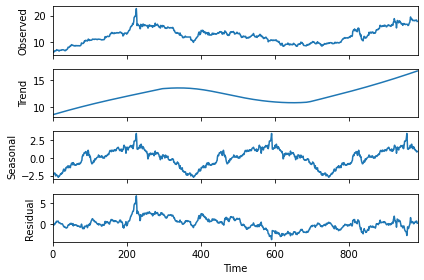

In [24]:
# Time Series Decomposition (Zaman Serisi Ayrışımı)
# EN - People are buying or selling stocks on a trending or seasonal basis. We can understand this from the visual that has become a pattern.
# TR - İnsanlar, trend durumuna ya da sezon olarak al sat işlemlerini yapmaktadır. Bunu bir örüntü haline gelen görselden anlayabiliriz.

asels_close = asels_df["Close"]
decomp = decompose(asels_close.values)
decomp.plot().show()

C:\Users\tnr_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



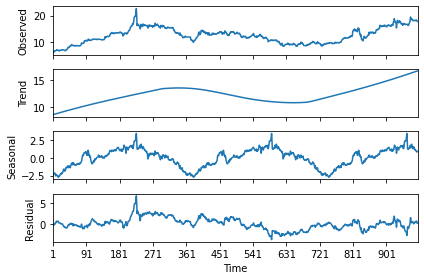

In [25]:
# EN - The part that differs from the above is to provide a more detailed visual by dividing it into 90-day slices.
# TR - Yukarıdan farklı olan durum, burada 90 günlük bölümleme işlemi ile daha fazla detay vermek.
decomp = decompose(asels_close.values)
decomp.plot().show()


positions = np.arange(1, len(asels_close), 90)

labels = positions

plt.xticks(positions, labels);

In [26]:
# (len(asels_df)//2)
# EN - you can use this method to seperate small part of data, If you work with bigger data
# TR - Yukaridaki boyut azaltma işlemi, daha büyük hisse verisi üzerinde çalışacaksanız kullanmaya uygundur.
close_asels = asels_df.iloc[:, 3 ]
close_asels

Date
2017-01-02     6.120000
2017-01-03     6.025000
2017-01-04     6.080000
2017-01-05     6.135000
2017-01-06     6.185000
                ...    
2020-10-20    18.190001
2020-10-21    18.110001
2020-10-22    18.280001
2020-10-23    18.049999
2020-10-26    17.750000
Name: Close, Length: 985, dtype: float64

In [27]:
# EN - Here, we define the operation by specifying 5 ('short'), 14('mid') and 21('long') intervals with the 'window' method
# TR - Burada 5 ('kısa'), 14('orta') ve 21('uzun') aralıklarını belirleyerek işlemleri 'window' metodu ile yapıyoruz

rolling_asels5 = close_asels.rolling(window=5).mean()
rolling_asels14 = close_asels.rolling(window = 14).mean()
rolling_asels21 = close_asels.rolling(window = 21).mean()

In [28]:
# EN - Here, we are merging with concatenation.
# TR - Burada concatenation ile birleştirme yapıyoruz.
MAs = pd.concat([close_asels,rolling_asels5,rolling_asels14,rolling_asels21] , axis = 1)

MAs.dropna( axis =0,  inplace=True)
MAs.columns = ['Close', "short", "mid", "long"]
MAs.head(30)

,Close,short,mid,long
Date,,,,
2017-01-30,6.790,6.691,6.755357,6.582857
2017-01-31,6.830,6.706,6.775000,6.616667
2017-02-01,6.840,6.768,6.793571,6.655476
2017-02-02,6.810,6.786,6.809286,6.690238
2017-02-03,6.825,6.819,6.807500,6.723095
2017-02-06,7.010,6.863,6.804643,6.762381
2017-02-07,7.000,6.897,6.808571,6.786429
2017-02-08,6.960,6.921,6.817143,6.802381
2017-02-09,6.950,6.949,6.823571,6.821190


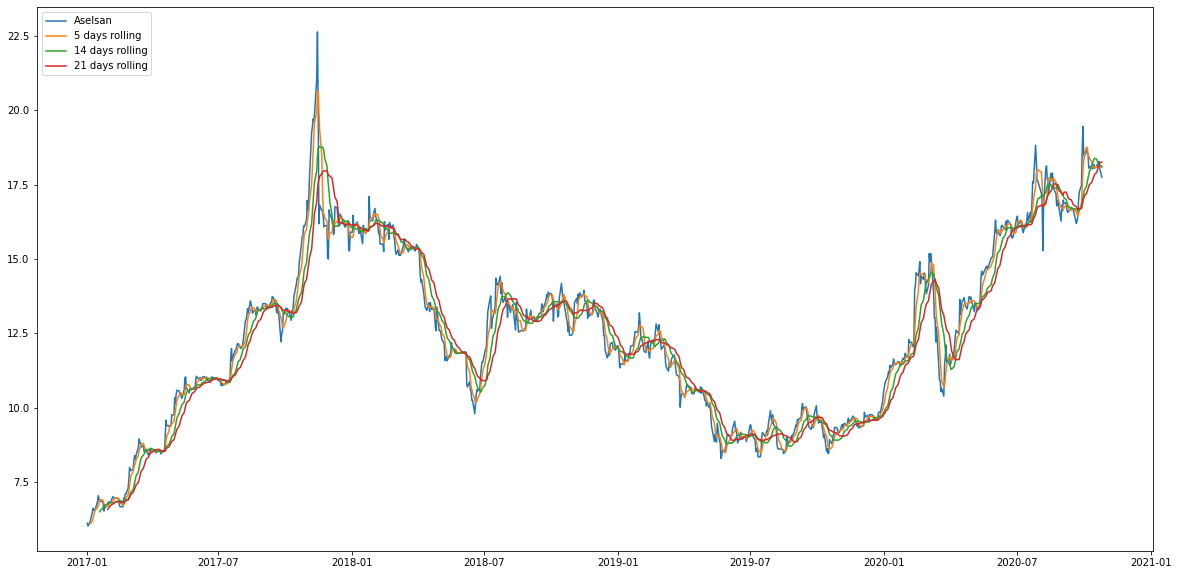

In [29]:
# EN - The intersection of the Green, Blue and Orange section is important for us. The points where the red, orange and green lines intersect are buy-sell advice for us
# TR - Yeşil - mavi - turuncu kesişimi bizim için önemli. Kırmızı, turuncu ve yeşil çizgilerinin kesiştiği noktalar bizim için al-sat tavsiyesi oluyor

fig,ax = plt.subplots(figsize= (20,10))
ax.plot(close_asels.index, close_asels, label = 'Aselsan')
ax.plot(rolling_asels5.index, rolling_asels5, label = '5 days rolling')
ax.plot(rolling_asels14.index, rolling_asels14, label = '14 days rolling')
ax.plot(rolling_asels21.index, rolling_asels21, label = '21 days rolling')
ax.legend(loc = 'upper left');

In [30]:
# EN - The system is completely based on this def structure. According to the results from here, it will give us green or red light.
# TR - Sistem, tamamen bu def yapısı üzerine kurulu. Buradan çıkan sonuçlara göre bize yeşil ya da kırmızı ışık verecek. 

def buy_sell(data, perc = 50):
  buy_sell = []
  buy_signal = []
  sell_signal = []
  flag = 42

  sm = np.abs(np.percentile(np.array(data["short"]  - data["mid"]) , perc))
  sl = np.abs(np.percentile(np.array(data["short"]  - data["long"]), perc))



  for i in range(0, len(data)):
    if (data["short"][i] > data["mid"][i] + sm) & (data["short"][i]  > data["long"][i] + sl):
      buy_signal.append(np.nan)
      if flag !=1:
        sell_signal.append(data["Close"][i])  
        buy_sell.append(data["Close"][i])
        flag = 1 
      else:
        sell_signal.append(np.nan)
    
    elif (data["short"][i] < data["mid"][i] - sm) & (data["short"][i]  < data["long"][i] - sl):
      sell_signal.append(np.nan)
      if flag !=0:
        buy_signal.append(data["Close"][i] )  
        buy_sell.append(-data["Close"][i])
        flag = 0
      else:
          buy_signal.append(np.nan)
    else:
      buy_sell.append(np.nan)      
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

  operations = np.array(buy_sell)
  operations = operations[~np.isnan(operations)]



  neg = 0  
  pos = 0
  for i in range(len(operations)):
    if operations[i] < 0:
      neg = i
      break

  for i in range(1, len(operations)):
    if operations[i] > 0:
      pos =  i- 1
      break
  operations = operations[neg:-pos]
  PL = np.sum(operations)
  return (buy_signal , sell_signal , PL)    



In [31]:
MAs.head()

,Close,short,mid,long
Date,,,,
2017-01-30,6.790,6.691,6.755357,6.582857
2017-01-31,6.830,6.706,6.775000,6.616667
2017-02-01,6.840,6.768,6.793571,6.655476
2017-02-02,6.810,6.786,6.809286,6.690238
2017-02-03,6.825,6.819,6.807500,6.723095


In [32]:
# EN - Finally, we assign the results from the def structure at the top as 'buy' - 'sell'.
# TR - Son olarak üst taraftaki def yapısından çıkan sonuçları 'al' - 'sat' olarak atama işlemi yapıyoruz.

m = buy_sell(MAs)
MAs["BUY"] = m[0]
MAs["SELL"] = m[1]

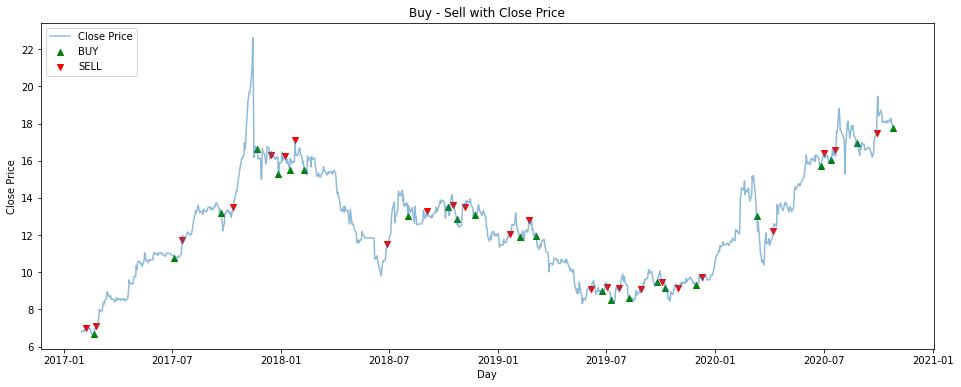

In [33]:
# EN - Graphically, its printout gives us buy and sell points.
# TR - Grafiksel olarak çıktısı, bize alım satım noktalarını veriyor. 

plt.figure( figsize = (16,6))
plt.scatter( MAs.index, MAs["BUY"], color = "green", label = "BUY", marker = '^', alpha = 1 )
plt.scatter( MAs.index, MAs["SELL"], color = "red", label = "SELL", marker = 'v', alpha = 1 )
plt.plot(  MAs["Close"], label = "Close Price", alpha = 0.5)
plt.title("Buy - Sell with Close Price")
plt.xlabel("Day")
plt.ylabel("Close Price")
plt.legend(loc="upper left")
plt.show()

In [34]:
# EN - Any transactions made here are not investment advice.
# TR - Burada yapılan hiçbir işlem yatırım tavsiyesi değildir.

# Sources (Kaynaklar) 

-https://www.youtube.com/VeriBilimiOkulu/


-https://finance.yahoo.com/quote/ASELS.IS?p=ASELS.IS&.tsrc=fin-srch


-https://www.tradingview.com/symbols/BIST-ASELS/technicals/